In [121]:
from sklearn.cluster import KMeans

from skimage.io import imread
from skimage import img_as_float
from skimage.measure import compare_psnr

import matplotlib.pyplot as plt
import pylab
%matplotlib inline

import pandas as pd
import numpy as np

In [18]:
image = imread('parrots.jpg')
image = img_as_float(image)

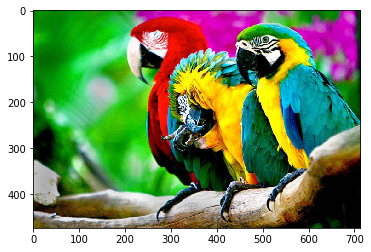

In [19]:
pylab.imshow(image);

In [23]:
image.shape

(474, 713, 3)

In [26]:
df = pd.DataFrame(image.reshape(474 * 713, 3))

In [27]:
df.head()

0         1         2
0  0.015686  0.494118  0.019608
1  0.007843  0.494118  0.007843
2  0.007843  0.494118  0.007843
3  0.007843  0.494118  0.007843
4  0.007843  0.501961  0.011765

In [31]:
kmc = KMeans(random_state=241)
df_trans = kmc.fit_transform(df)

In [85]:
df_means, df_medians = df.copy(), df.copy()
for label in np.unique(kmc.labels_):
    df_means.loc[kmc.labels_ == label, :] = df[kmc.labels_ == label].mean().values.reshape(1, 3)
    df_medians.loc[kmc.labels_ == label, :] = df[kmc.labels_ == label].median().values.reshape(1, 3)

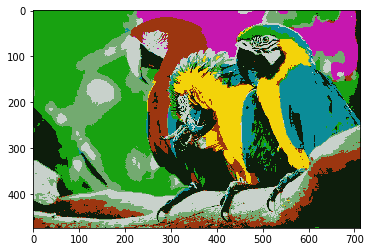

In [94]:
image_means = df_means.values.reshape(474, 713, 3)
pylab.imshow(image_means);

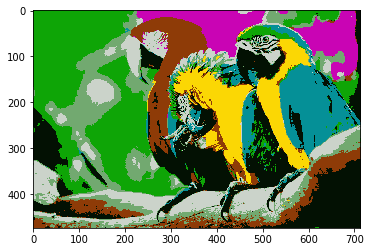

In [95]:
image_medians = df_medians.values.reshape(474, 713, 3)
pylab.imshow(image_medians);

Clusters number - 1
Result: means - 9.818835544771293, medians - 9.427840460507397
Clusters number - 2
Result: means - 12.080177084931087, medians - 11.655077266907849
Clusters number - 3
Result: means - 13.153487044607248, medians - 12.774948175099812
Clusters number - 4
Result: means - 14.3678179408688, medians - 14.005928721924676
Clusters number - 5
Result: means - 15.527146197305989, medians - 15.17790907734613
Clusters number - 6
Result: means - 16.543994096630183, medians - 16.051176778469276
Clusters number - 7
Result: means - 17.64099250863652, medians - 17.339368491425024
Clusters number - 8
Result: means - 18.436829014063576, medians - 18.1379714433961
Clusters number - 9
Result: means - 19.112672735788138, medians - 18.81388735617062
Clusters number - 10
Result: means - 19.64075663591531, medians - 19.41747251552106
Clusters number - 11
Result: means - 20.127588746514583, medians - 19.84128407389954


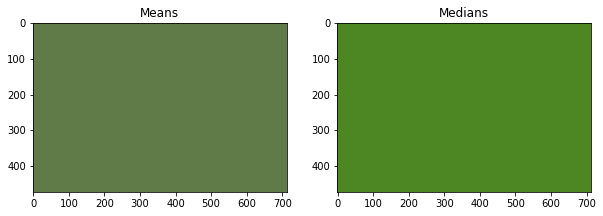

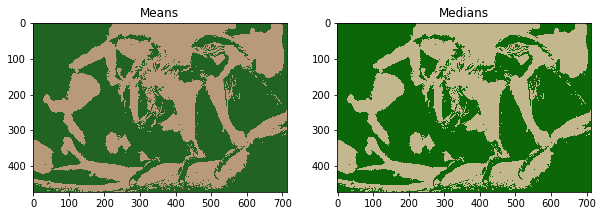

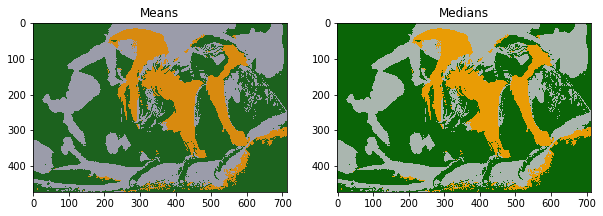

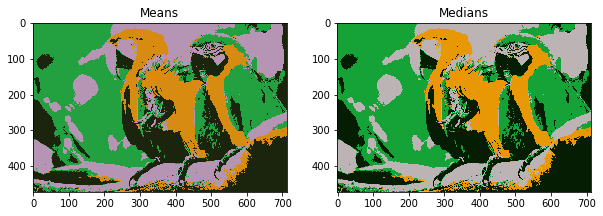

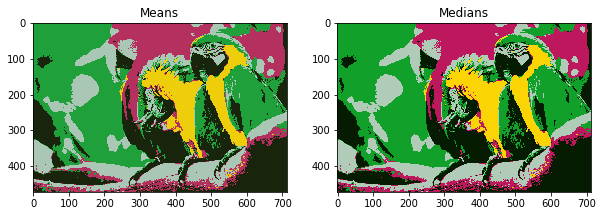

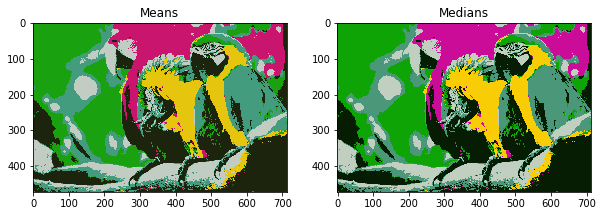

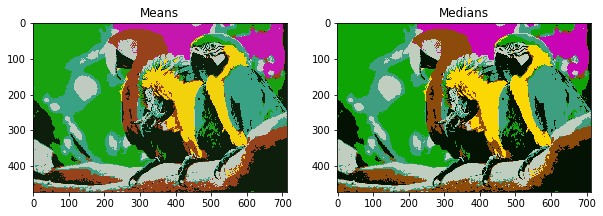

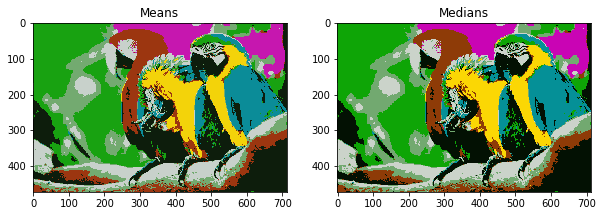

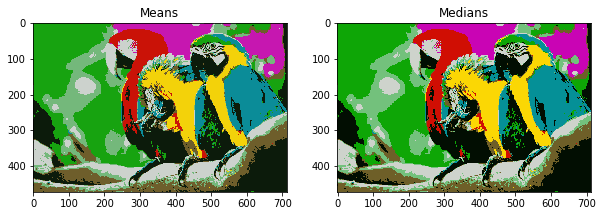

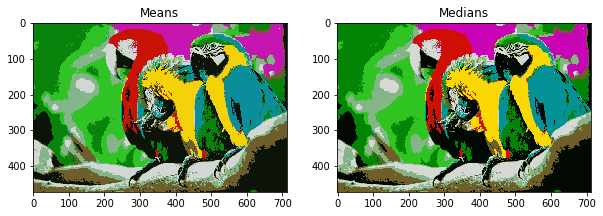

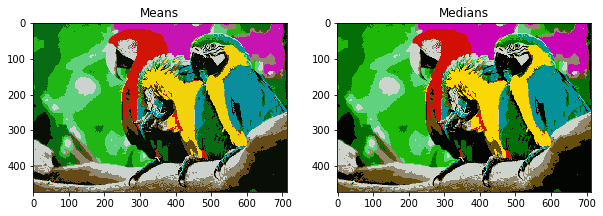

In [133]:
result = {}
for n_clusters in range(1, 12):
    fig = plt.figure(figsize=(10, 10))
    print(f"Clusters number - {n_clusters}")
    # Обучаем модель кластеризации
    kmc = KMeans(n_clusters=n_clusters, random_state=241)
    kmc.fit(df)

    # Заполяем кластеры средними и медианными значениями по кластеру
    df_means, df_medians = df.copy(), df.copy()
    for label in np.unique(kmc.labels_):
        df_means.loc[kmc.labels_ == label, :] = df[kmc.labels_ == label].mean().values.reshape(1, 3)
        df_medians.loc[kmc.labels_ == label, :] = df[kmc.labels_ == label].median().values.reshape(1, 3)
        
    # Картиним рисунки
    image_means = df_means.values.reshape(474, 713, 3)
    a = fig.add_subplot(1, 2, 1)
    a.set_title("Means")
    pylab.imshow(image_means);

    image_medians = df_medians.values.reshape(474, 713, 3)
    a = fig.add_subplot(1, 2, 2)
    a.set_title("Medians")
    pylab.imshow(image_medians);
    
    means, medians = compare_psnr(image, image_means), compare_psnr(image, image_medians)
    result[n_clusters] = means, medians
    print(f"Result: means - {means}, medians - {medians}")

In [105]:
with open('1-1', 'w', encoding='utf-8') as f:
    f.write('11')

In [119]:
def psnr(true, test):
    true_f = true.flatten()
    test_f = test.flatten()
    return 10 * np.log10(1 / np.mean(np.square(true_f - test_f)))

In [120]:
result_ = {}

for n_clusters in range(1, 21):
    print(f"Clusters number - {n_clusters}")
    kmc = KMeans(n_clusters=n_clusters, random_state=241)
    kmc.fit(df)
    df_means, df_medians = df.copy(), df.copy()
    for label in np.unique(kmc.labels_):
        df_means.loc[kmc.labels_ == label, :] = df[kmc.labels_ == label].mean().values.reshape(1, 3)
        df_medians.loc[kmc.labels_ == label, :] = df[kmc.labels_ == label].median().values.reshape(1, 3)
    image_means = df_means.values.reshape(474, 713, 3)
    pylab.imshow(image_means);
    image_medians = df_medians.values.reshape(474, 713, 3)
    pylab.imshow(image_medians);
    means, medians = psnr(image, image_means), psnr(image, image_medians)
    result_[n_clusters] = means, medians
    print(f"Result: means - {means}, medians - {medians}")

Clusters number - 1
Result: means - 9.818835544771293, medians - 9.427840460507397
Clusters number - 2
Result: means - 12.080177084931087, medians - 11.655077266907849
Clusters number - 3
Result: means - 13.153487044607248, medians - 12.774948175099812
Clusters number - 4
Result: means - 14.3678179408688, medians - 14.005928721924676
Clusters number - 5
Result: means - 15.527146197305989, medians - 15.17790907734613
Clusters number - 6
Result: means - 16.543994096630183, medians - 16.051176778469276
Clusters number - 7
Result: means - 17.64099250863652, medians - 17.339368491425024
Clusters number - 8
Result: means - 18.436829014063576, medians - 18.1379714433961
Clusters number - 9
Result: means - 19.112672735788138, medians - 18.81388735617062
Clusters number - 10
Result: means - 19.64075663591531, medians - 19.41747251552106
Clusters number - 11
Result: means - 20.127588746514583, medians - 19.84128407389954
Clusters number - 12
Result: means - 20.5925163195166, medians - 20.3044110